In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11706 entries, 0 to 11705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11706 non-null  int64  
 1   trans_date_trans_time  11706 non-null  object 
 2   cc_num                 11706 non-null  int64  
 3   merchant               11706 non-null  object 
 4   category               11706 non-null  object 
 5   amt                    11706 non-null  float64
 6   first                  11706 non-null  object 
 7   last                   11706 non-null  object 
 8   gender                 11706 non-null  object 
 9   street                 11706 non-null  object 
 10  city                   11706 non-null  object 
 11  state                  11706 non-null  object 
 12  zip                    11706 non-null  int64  
 13  lat                    11706 non-null  float64
 14  long                   11706 non-null

In [ ]:
print("\nTrain Data Sample:")
print(train_data.head())


Train Data Sample:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Green

In [ ]:
print(test_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
print("\nTrain Data Summary Statistics:")
print(train_data.describe())


Train Data Summary Statistics:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  11705.000000  1.170500e+04  11705.000000  11705.000000  11705.000000   
mean    5852.000000  4.258741e+17     68.765282  49212.680308     38.561848   
std     3379.086785  1.320828e+18    113.383289  27101.345357      5.173802   
min        0.000000  6.041621e+10      1.010000   1257.000000     20.027100   
25%     2926.000000  1.800462e+14      9.750000  26041.000000     34.743700   
50%     5852.000000  3.521417e+15     48.500000  48438.000000     39.371600   
75%     8778.000000  4.642255e+15     83.130000  72165.000000     41.846700   
max    11704.000000  4.992346e+18   3178.510000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  11705.000000  1.170500e+04  1.170500e+04  11705.000000  11705.000000   
mean     -90.541751  8.952753e+04  1.325688e+09     38.560738    -90.535437   
std       14.353752

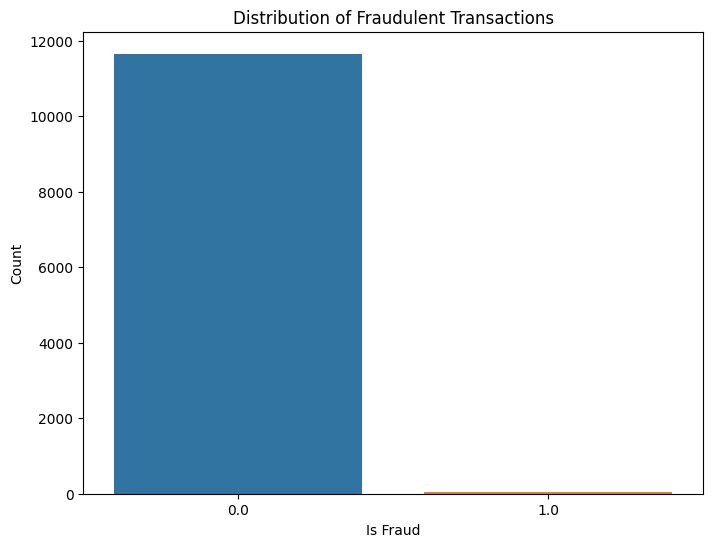

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

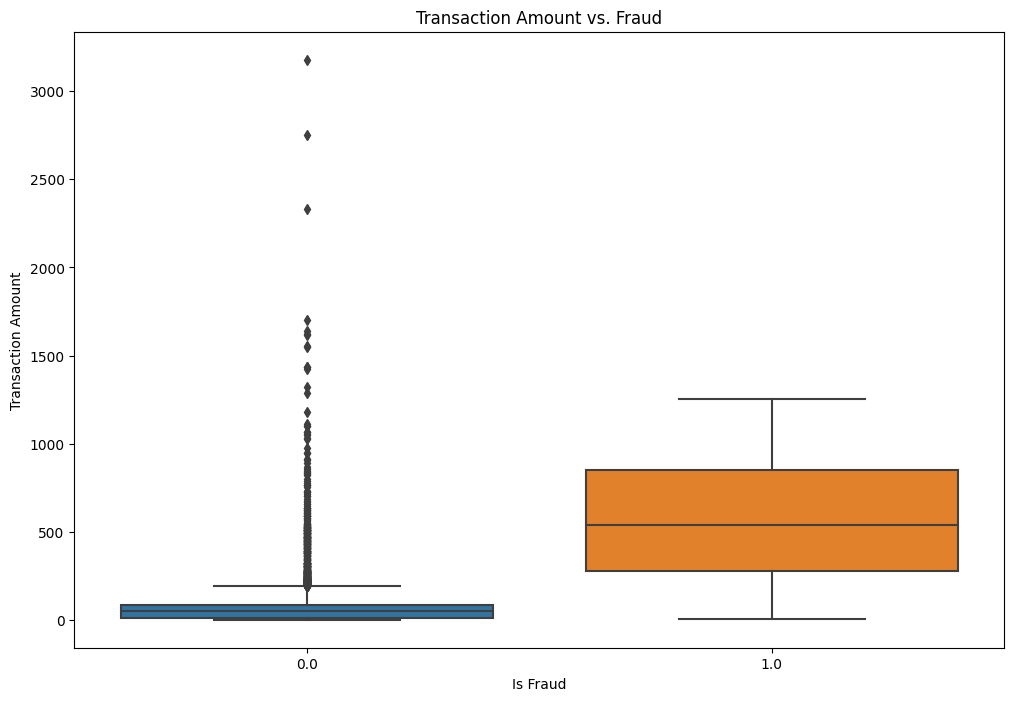

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

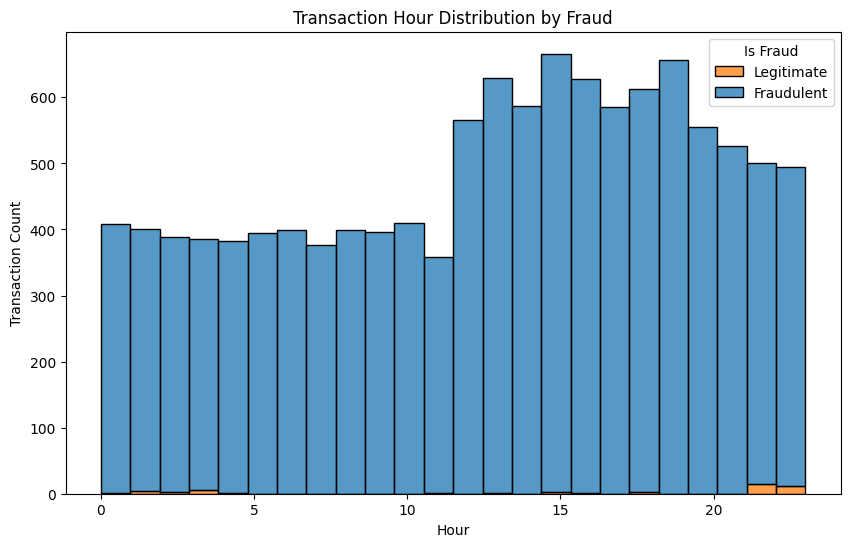

In [ ]:
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_data[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_data[categorical_cols]).toarray()

scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_data[numerical_cols])
scaled_test_features = scaler.transform(test_data[numerical_cols])

final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

# Define target variables
train_target = train_data['is_fraud']
test_target = test_data['is_fraud']


In [ ]:

smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [ ]:
print('Current length of the training set: ', len(y_train_resample))

Current length of the training set:  23314


In [ ]:
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

# Make predictions on test data
lg_predictions = lg_model.predict(x_validation)

# Calculate evaluation metrics on test data
lg_accuracy = accuracy_score(y_validation, lg_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

Logistic Regression Accuracy: 98.722%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


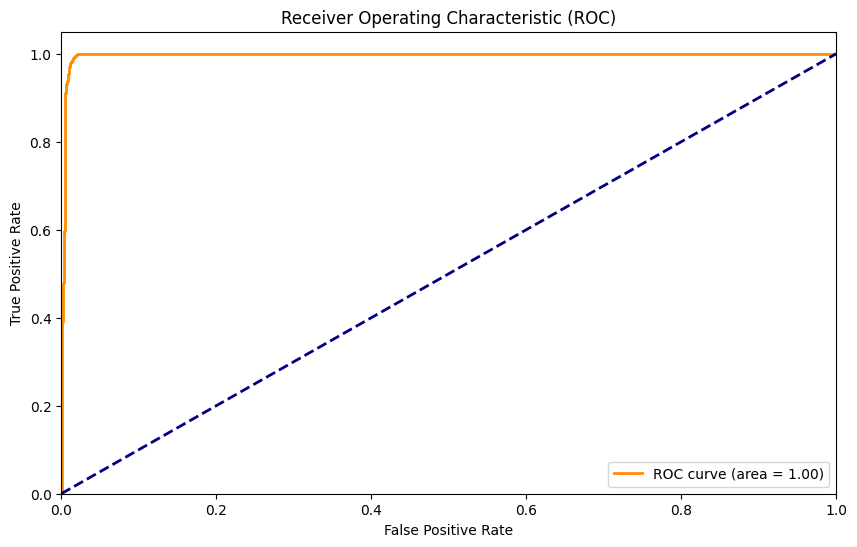

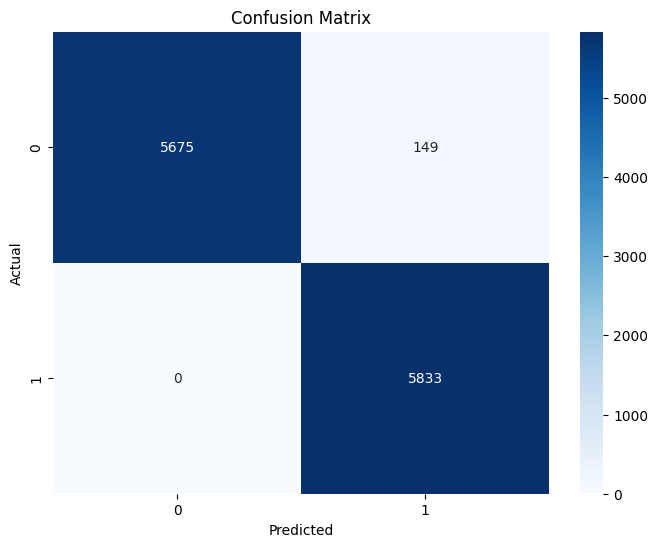

In [ ]:
probs = lg_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

conf_matrix = confusion_matrix(y_validation, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 99.949%


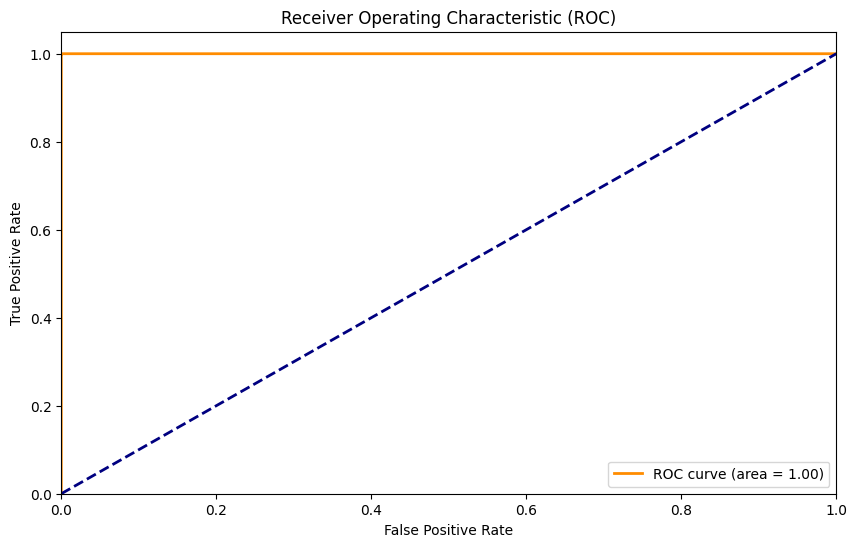

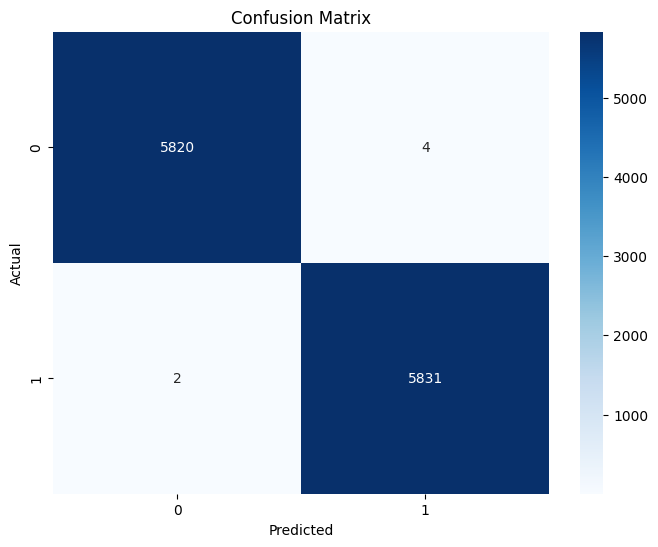

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# Make predictions on test data
rf_predictions = rf_model.predict(x_validation)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_validation, rf_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

probs = rf_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

conf_matrix = confusion_matrix(y_validation, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define model names and instances
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'MLP', 'SGD', 'Extra Trees']
model_instances = [lg_model, svm_model, knn_model, rf_model, mlp_model, sgd_model, extra_trees_model]

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(final_test_features)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})

# Print the comparison table
print(results_df)

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define model names and instances
model_names = ['Logistic Regression', 'Random Forest']
model_instances = [lg_model, rf_model]

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(final_test_features)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})

# Print the comparison table
print(results_df)

                 Model  Accuracy  ROC Score  F1 Score  Precision Score  \
0  Logistic Regression  0.997521   0.500000       0.0              0.0   
1        Random Forest  0.996238   0.499357       0.0              0.0   

   Recall Score  
0           0.0  
1           0.0  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
